In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from sklearn import linear_model
import scipy.stats as stats
from scipy import signal
import statsmodels.api as sm
from datetime import datetime

In [3]:
coin_week = pd.read_csv('../files/coin_weeks_2019_2022.csv')
sp_week = pd.read_csv('../files/sp_500_weeks_2019_2022.csv')
coin_week.head()
sp_week.head()

,Date,Open,High,Low,Close
0,2019-05-24,2841.94,2868.88,2805.49,2826.06
1,2019-05-31,2830.03,2840.51,2750.52,2752.06
2,2019-06-07,2751.53,2884.97,2728.81,2873.34
3,2019-06-14,2885.83,2910.61,2874.68,2886.98
4,2019-06-21,2889.75,2964.15,2887.30,2950.46


[   0   -1   -2   -3   -4   -5   -6   -7   -8   -9  -10  -11  -12  -13
  -14  -15  -16  -17  -18  -19  -20  -21  -22  -23  -24  -25  -26  -27
  -28  -29  -30  -31  -32  -33  -34  -35  -36  -37  -38  -39  -40  -41
  -42  -43  -44  -45  -46  -47  -48  -49  -50  -51  -52  -53  -54  -55
  -56  -57  -58  -59  -60  -61  -62  -63  -64  -65  -66  -67  -68  -69
  -70  -71  -72  -73  -74  -75  -76  -77  -78  -79  -80  -81  -82  -83
  -84  -85  -86  -87  -88  -89  -90  -91  -92  -93  -94  -95  -96  -97
  -98  -99 -100 -101 -102 -103 -104 -105 -106 -107 -108 -109 -110 -111
 -112 -113 -114 -115 -116 -117 -118 -119 -120 -121 -122 -123 -124 -125
 -126 -127 -128 -129 -130 -131 -132 -133 -134 -135 -136 -137 -138 -139
 -140 -141 -142 -143 -144 -145 -146 -147 -148 -149 -150 -151 -152 -153
 -154 -155]


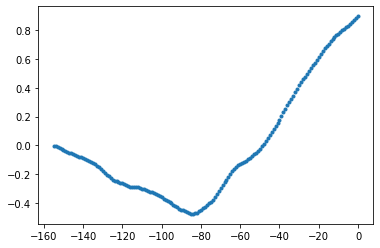

In [4]:
ccr = sm.tsa.stattools.ccf(coin_week['High'], sp_week['High'], adjusted=False)
lags = np.arange(0,len(ccr))
lags = -lags
print(lags)
plt.plot(lags, ccr, '.')

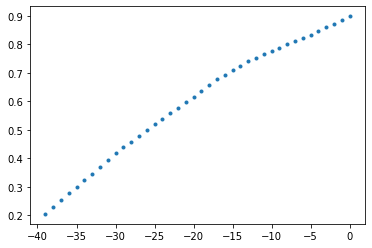

In [5]:
type(ccr)
ccr40 = ccr[0:40]
lags40 = - np.arange(0,40)

plt.plot(lags40, ccr40, '.')

In [6]:
X = sm.add_constant(lags40)
model = sm.OLS(ccr40, X).fit()

In [7]:
print(model.params)
print(model.pvalues)

[0.94509397 0.01775476]
[3.25591444e-50 3.20983913e-36]


Text(0.5, 1.0, 'log(1 - ccr) ~ lags')

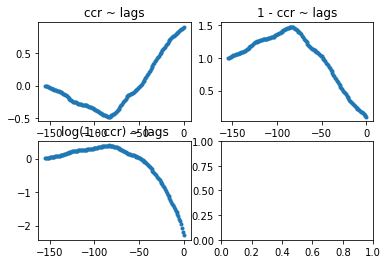

In [27]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(lags, ccr, '.')
axis[0, 0].set_title("ccr ~ lags")
axis[0, 1].plot(lags, 1 - ccr, '.')
axis[0, 1].set_title("1 - ccr ~ lags")
axis[1, 0].plot(lags, np.log(1 - ccr), '.')
axis[1, 0].set_title("log(1 - ccr) ~ lags")